### Spaceship Titanic prediction (Kaggle Competition)
##### Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

##### The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

##### While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

##### To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

### Import library and dataset

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import xgboost as xgb
from sklearn.model_selection import cross_val_score,GridSearchCV

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: >

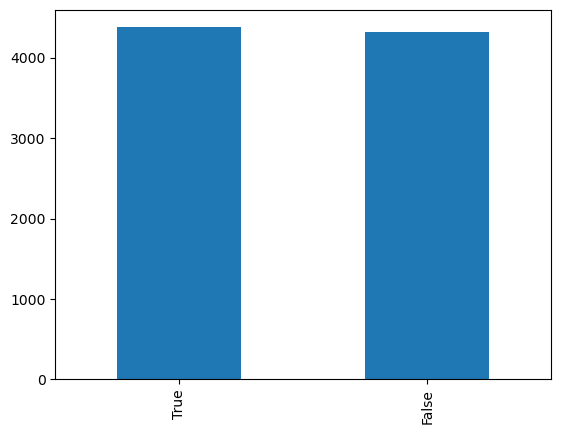

In [6]:
# No bias in the training dataset
plot_df = df_train.Transported.value_counts()
plot_df.plot(kind="bar")

<Axes: xlabel='VRDeck', ylabel='Count'>

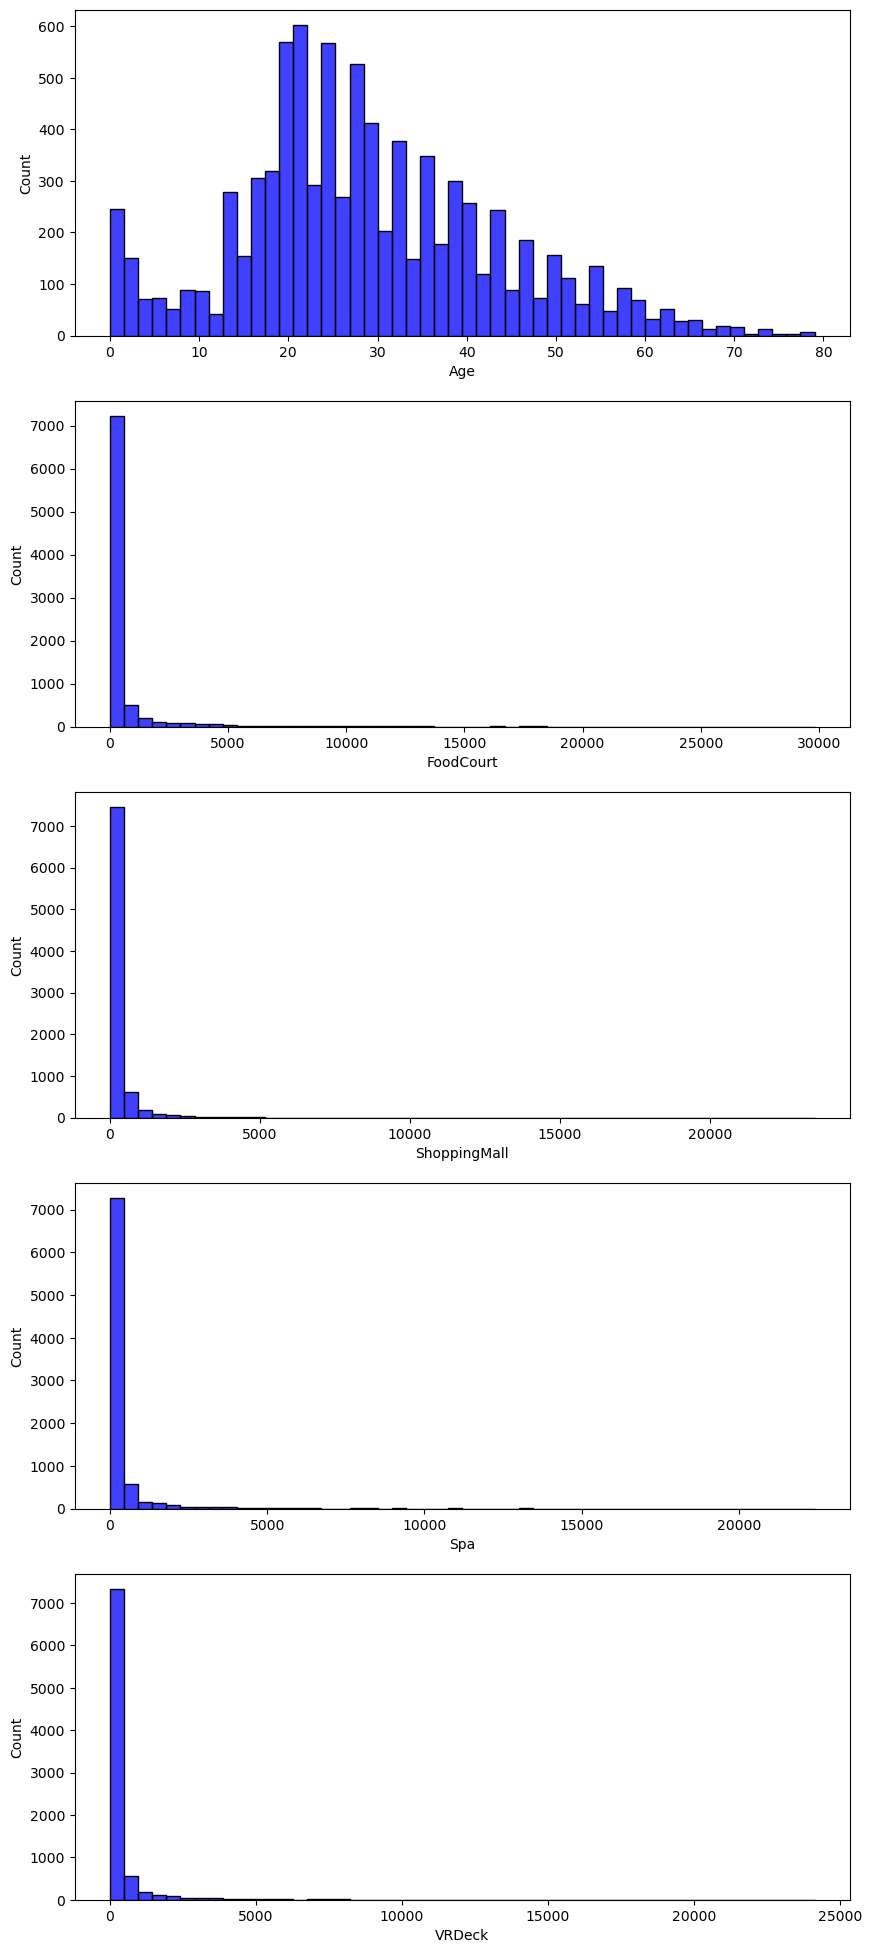

In [7]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df_train['Age'], color='b', bins=50, ax=ax[0])
sns.histplot(df_train['FoodCourt'], color='b', bins=50, ax=ax[1])
sns.histplot(df_train['ShoppingMall'], color='b', bins=50, ax=ax[2])
sns.histplot(df_train['Spa'], color='b', bins=50, ax=ax[3])
sns.histplot(df_train['VRDeck'], color='b', bins=50, ax=ax[4])

### Preprocessing

In [8]:
# Numerical valuses
df_train["Age"].fillna(df_train["Age"].median(), inplace=True)
df_train["FoodCourt"].fillna(df_train["FoodCourt"].median(), inplace=True)
df_train["ShoppingMall"].fillna(df_train["ShoppingMall"].median(), inplace=True)
df_train["Spa"].fillna(df_train["Spa"].median(), inplace=True)
df_train["VRDeck"].fillna(df_train["VRDeck"].median(), inplace=True)
df_train["RoomService"].fillna(df_train["RoomService"].median(), inplace=True)
# Categorical Values
df_train["HomePlanet"].fillna(df_train["HomePlanet"].mode().values[0], inplace=True)
df_train["CryoSleep"].fillna(df_train["CryoSleep"].mode().values[0], inplace=True)
df_train["Destination"].fillna(df_train["Destination"].mode().values[0], inplace=True)
df_train["VIP"].fillna(df_train["VIP"].mode().values[0], inplace=True)

In [9]:
# Numerical valuses
df_test["Age"].fillna(df_test["Age"].median(), inplace=True)
df_test["FoodCourt"].fillna(df_test["FoodCourt"].median(), inplace=True)
df_test["ShoppingMall"].fillna(df_test["ShoppingMall"].median(), inplace=True)
df_test["Spa"].fillna(df_test["Spa"].median(), inplace=True)
df_test["VRDeck"].fillna(df_test["VRDeck"].median(), inplace=True)
df_test["RoomService"].fillna(df_test["RoomService"].median(), inplace=True)
# Categorical Values
df_test["HomePlanet"].fillna(df_test["HomePlanet"].mode().values[0], inplace=True)
df_test["CryoSleep"].fillna(df_test["CryoSleep"].mode().values[0], inplace=True)
df_test["Destination"].fillna(df_test["Destination"].mode().values[0], inplace=True)
df_test["VIP"].fillna(df_test["VIP"].mode().values[0], inplace=True)

In [10]:
df_train['Cabin'] =df_train['Cabin'].fillna('T/0/P')
df_test['Cabin'] =df_test['Cabin'].fillna('T/0/P')

In [11]:
df_train[['Deck','Num','Side']] = df_train.Cabin.str.split('/',expand=True)
df_test[['Deck','Num','Side']] = df_test.Cabin.str.split('/',expand=True)

In [12]:
df_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1,P


In [13]:
from sklearn.preprocessing import LabelEncoder

categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate((df_train[i], df_test[i])).astype(str)
    le.fit(arr)
    df_train[i]=le.transform(df_train[i].astype(str))
    df_test[i]=le.transform(df_test[i].astype(str))

HomePlanet
CryoSleep
Destination
VIP
Deck
Side
Num


In [14]:
df_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0,1
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1,1
5,0005_01,0,0,F/0/P,1,44.0,0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,5,0,0
6,0006_01,0,0,F/2/S,2,26.0,0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,5,1006,1
7,0006_02,0,1,G/0/S,2,28.0,0,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True,6,0,1
8,0007_01,0,0,F/3/S,2,35.0,0,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,5,1117,1
9,0008_01,1,1,B/1/P,0,14.0,0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,1,1,0


In [15]:
df_test.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0013_01,0,1,G/3/S,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,6,1117,1
1,0018_01,0,0,F/4/S,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,5,1228,1
2,0019_01,1,1,C/0/S,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,2,0,1
3,0021_01,1,0,C/1/S,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,2,1,1
4,0023_01,0,0,F/5/S,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,5,1339,1
5,0027_01,0,0,F/7/P,2,31.0,0,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks,5,1561,0
6,0029_01,1,1,B/2/P,0,21.0,0,0.0,0.0,0.0,0.0,0.0,Aldah Ainserfle,1,1006,0
7,0032_01,1,1,D/0/S,2,20.0,0,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,3,0,1
8,0032_02,1,1,D/0/S,0,23.0,0,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,3,0,1
9,0033_01,0,0,F/7/S,0,24.0,0,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson,5,1561,1


In [16]:
df_train= df_train.drop(['Name','Cabin'],axis=1)
df_test= df_test.drop(['Name','Cabin'],axis=1)

In [17]:
df_train= df_train.drop(['PassengerId'],axis=1)
df_test= df_test.drop(['PassengerId'],axis=1)

In [18]:
df_train['Transported']=df_train['Transported'].replace({True:1,False:0})
X = df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [19]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1872,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,6,556,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,6,559,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4,1460,1


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_val)

### Model training

In [23]:
model = xgb.XGBClassifier(gamma = 1.5,
                           subsample = 1.0,
                           max_depth = 5,
                           colsample_bytree = 1.0,
                           n_estimators = 100)

In [38]:
model.fit(X_train,
          y_train,
          verbose=True,
          early_stopping_rounds=10,
          eval_metric='aucpr',
          eval_set=[(X_val,y_val)]
          )

[0]	validation_0-aucpr:0.86527
[1]	validation_0-aucpr:0.87924
[2]	validation_0-aucpr:0.88193
[3]	validation_0-aucpr:0.88685
[4]	validation_0-aucpr:0.88643
[5]	validation_0-aucpr:0.89125
[6]	validation_0-aucpr:0.89636


[7]	validation_0-aucpr:0.89765
[8]	validation_0-aucpr:0.89903
[9]	validation_0-aucpr:0.90264
[10]	validation_0-aucpr:0.90283
[11]	validation_0-aucpr:0.90433
[12]	validation_0-aucpr:0.90482
[13]	validation_0-aucpr:0.90485
[14]	validation_0-aucpr:0.90531
[15]	validation_0-aucpr:0.90618
[16]	validation_0-aucpr:0.90597
[17]	validation_0-aucpr:0.90619
[18]	validation_0-aucpr:0.90656
[19]	validation_0-aucpr:0.90668
[20]	validation_0-aucpr:0.90623
[21]	validation_0-aucpr:0.90770
[22]	validation_0-aucpr:0.90767
[23]	validation_0-aucpr:0.90716
[24]	validation_0-aucpr:0.90823
[25]	validation_0-aucpr:0.90864
[26]	validation_0-aucpr:0.90871
[27]	validation_0-aucpr:0.90866
[28]	validation_0-aucpr:0.90850
[29]	validation_0-aucpr:0.90845
[30]	validation_0-aucpr:0.90814
[31]	validation_0-aucpr:0.90830
[32]	validation_0-aucpr:0.90797
[33]	validation_0-aucpr:0.90791
[34]	validation_0-aucpr:0.90831
[35]	validation_0-aucpr:0.90767
[36]	validation_0-aucpr:0.90761


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
## first round 
# param_grid = {
#     'max_depth':[3,4,5],
#     'learning_rate':[0.1,0.01,0.05],
#     'gamma':[0,0.25,1.0],
#     'reg_lambda':[0,1.0,10.0],
#     'scale_pos_weight':[1,3,5]
# }

In [45]:
# second round 
param_grid = {
    'max_depth':[4],
    'learning_rate':[0.1,0.5,1],
    'gamma':[2.0,10.0,1.0],
    'reg_lambda':[0,0.1,0.05],
    'scale_pos_weight':[0.1,0.5,1]
}

In [46]:
optimal_params=GridSearchCV(
    estimator=xgb.XGBClassifier(
        objective='binary:logistic',
        subsample=0.9, # only select 90% of data in each tree, to save time
        colsample_bytree=0.5 # only select 50% of data in each tree, to save time
    ),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3
)

optimal_params.fit(
    X_train,
    y_train,
    early_stopping_rounds=10,
    eval_metric='auc',
    eval_set=[(X_val,y_val)],
    verbose=False
)
print(optimal_params.best_params_)

{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 0, 'scale_pos_weight': 1}


c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [47]:
model = xgb.XGBClassifier(gamma = 1.0,
                          objective='binary:logistic',
                          learning_rate=0.1,
                          subsample = 0.9,
                          colsample_bytree=0.5,
                          max_depth = 4,
                          reg_lambda=0,
                          scale_pos_weight=1)

In [48]:
model.fit(X_train,
          y_train,
          verbose=True,
          early_stopping_rounds=10,
          eval_metric='aucpr',
          eval_set=[(X_val,y_val)]
          )

[0]	validation_0-aucpr:0.73853
[1]	validation_0-aucpr:0.78771
[2]	validation_0-aucpr:0.83858
[3]	validation_0-aucpr:0.85681
[4]	validation_0-aucpr:0.85880
[5]	validation_0-aucpr:0.86529
[6]	validation_0-aucpr:0.86451
[7]	validation_0-aucpr:0.86665
[8]	validation_0-aucpr:0.86699
[9]	validation_0-aucpr:0.87093
[10]	validation_0-aucpr:0.87110
[11]	validation_0-aucpr:0.87188
[12]	validation_0-aucpr:0.87141
[13]	validation_0-aucpr:0.87242
[14]	validation_0-aucpr:0.87298
[15]	validation_0-aucpr:0.87274
[16]	validation_0-aucpr:0.87457
[17]	validation_0-aucpr:0.87604
[18]	validation_0-aucpr:0.87690
[19]	validation_0-aucpr:0.87872
[20]	validation_0-aucpr:0.87830
[21]	validation_0-aucpr:0.87966
[22]	validation_0-aucpr:0.87899
[23]	validation_0-aucpr:0.88032
[24]	validation_0-aucpr:0.88164
[25]	validation_0-aucpr:0.88285
[26]	validation_0-aucpr:0.88453
[27]	validation_0-aucpr:0.88584
[28]	validation_0-aucpr:0.88718
[29]	validation_0-aucpr:0.88790
[30]	validation_0-aucpr:0.88786
[31]	validation_0-

c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-aucpr:0.89591
[52]	validation_0-aucpr:0.89570
[53]	validation_0-aucpr:0.89622
[54]	validation_0-aucpr:0.89625
[55]	validation_0-aucpr:0.89642
[56]	validation_0-aucpr:0.89678
[57]	validation_0-aucpr:0.89717
[58]	validation_0-aucpr:0.89743
[59]	validation_0-aucpr:0.89746
[60]	validation_0-aucpr:0.89797
[61]	validation_0-aucpr:0.89812
[62]	validation_0-aucpr:0.89840
[63]	validation_0-aucpr:0.89840
[64]	validation_0-aucpr:0.89852
[65]	validation_0-aucpr:0.89857
[66]	validation_0-aucpr:0.89914
[67]	validation_0-aucpr:0.89906
[68]	validation_0-aucpr:0.89927
[69]	validation_0-aucpr:0.89922
[70]	validation_0-aucpr:0.89908
[71]	validation_0-aucpr:0.89896
[72]	validation_0-aucpr:0.89890
[73]	validation_0-aucpr:0.89893
[74]	validation_0-aucpr:0.89913
[75]	validation_0-aucpr:0.89922
[76]	validation_0-aucpr:0.89908
[77]	validation_0-aucpr:0.89930
[78]	validation_0-aucpr:0.89971
[79]	validation_0-aucpr:0.89958
[80]	validation_0-aucpr:0.89982
[81]	validation_0-aucpr:0.90025
[82]	val

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
y_pred = model.predict(X_val)

In [50]:
score = accuracy_score(y_val, y_pred)
score

0.7999080036798528

In [51]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1077
           1       0.78      0.84      0.81      1097

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174



In [52]:
y_pred_test = model.predict(df_test)

In [53]:
y_pred_test

array([1, 0, 1, ..., 1, 1, 1])

In [54]:
submission = pd.read_csv('sample_submission.csv')

In [55]:
submission["Transported"] = y_pred_test

In [56]:
submission

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [57]:
submission['Transported'] = submission['Transported'].map({1: True, 0: False})

In [58]:
submission[['PassengerId', 'Transported']].to_csv('predictions.csv', index=False)

### Conclusion
##### This is my first formal machine learning project. On top of that, having a transformation process helps a lot with accuracy.